# Perceptron Assignment 
This is a submission by 18MCMT28

## Import necessary packages
matplotlib for plotting and numpy for managing the huge arrays



In [74]:
import matplotlib.pyplot as plt
import numpy as np

In [75]:
%matplotlib notebook

In [76]:
# Storing the datasets
dataset1_x = np.array([1, 7, 8, 9, 4, 8], dtype=np.float128)
dataset1_y = np.array([6, 2, 9, 9, 8, 5], dtype=np.float128)
dataset2_x = np.array([2, 3, 2, 7, 1, 5], dtype=np.float128)
dataset2_y = np.array([1, 3, 4, 1, 3, 2], dtype=np.float128)

<IPython.core.display.Javascript object>


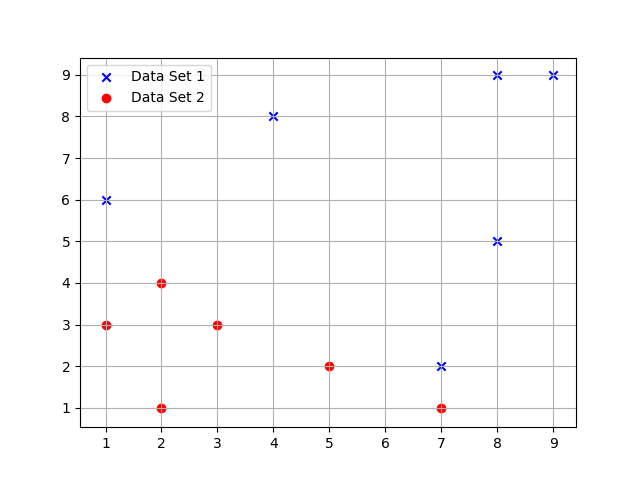

In [78]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid(True)
ax.scatter(x=dataset1_x, y=dataset1_y, color='blue', marker='x', label='Data Set 1')
ax.scatter(x=dataset2_x, y=dataset2_y, color='red', marker='o', label='Data Set 2')
plt.legend(loc='upper left')

## Implementation of perceptron with threshold activation function

In [79]:
class Perceptron():
    """Implements a single perceptron with binary threshold activation function"""
    def __init__(self, input_dimensions, learning_rate=1, epochs=100):
        self.Weights = np.zeros(input_dimensions + 1) # An extra one for bias
        self.epochs = epochs
        self.eta = learning_rate
        
    # The activation function
    def activation_fn(self, y):
        return 1 if y >= 0 else 0
    
    def find_output(self, input_matrix):
        z = self.Weights.T.dot(input_matrix)
        return self.activation_fn(z)
    
    def learn(self, input_vector, desired_output):
        for _ in range(self.epochs):
            for i in range(desired_output.shape[0]):
                # Insert the weight 1 for every input for the bais
                x = np.insert(input_vector[i], 0, 1)
                actual_output = self.find_output(x)
                error = desired_output[i] - actual_output
                self.Weights = self.Weights + self.eta * error * x

### Shape the dataset accordingly

In [80]:
# Create Set A for all points with output one
set_A = np.column_stack((dataset1_x, dataset1_y))
set_A_outputs = np.ones(len(set_A))

# Create Set B similarly with output zero
set_B = np.column_stack((dataset2_x, dataset2_y))
set_B_outputs = np.zeros(len(set_B))

# Mash everything together
data = np.concatenate((set_A, set_B))
desired = np.concatenate((set_A_outputs, set_B_outputs))
desired

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])

In [81]:
single_perceptron = Perceptron(input_dimensions=2)
single_perceptron.learn(data, desired)
print(single_perceptron.Weights)

[-18.   2.   3.]


From the above output, we can conclude that the algorithm converged at the following weights: $x_{0} = -18$,  $x_{1} = 2$, $x_{2} = 3$; where $x_{0}$ is the bais term.


## Finding error and accuracy for the dataset
We take the perceptron that has learned these weights and apply to the dataset we have, to find the error and accuracy fo the perceptron

In [82]:
correct = 0
for index, arr in enumerate(data):
    if single_perceptron.find_output(np.insert(arr, 0, 1)) == desired[index]:
        correct += 1
accuracy = correct / len(data)
error = 1 - accuracy
print("Accuracy = " + str(accuracy * 100) + "%\nError = " + str(error * 100) + '%')

Accuracy = 100.0%
Error = 0.0%


The above results are not surprising because the perceptron learning algorithm is gauranteed to converge if the data set is linearly seperable

## Visualizing the perceptron
Let's see the boundary that the perceptron has learnt

<IPython.core.display.Javascript object>


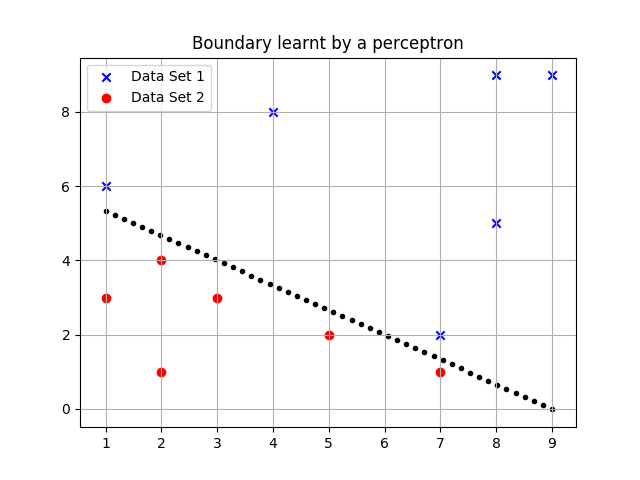

Text(0.5,1,'Boundary learnt by a perceptron')

In [83]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x=dataset1_x, y=dataset1_y, color='blue', marker='x', label='Data Set 1')
ax.scatter(x=dataset2_x, y=dataset2_y, color='red', marker='o', label='Data Set 2')
plt.grid(True)
# To plot the boundary
weights = single_perceptron.Weights
slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
intercept = -weights[0]/weights[2]
for i in np.linspace(np.amin(data, axis=0)[0], np.amax(data, axis=0)[0], ):
    y = (slope * i) + intercept
    ax.scatter(x=i, y=y, color='black', marker='.')
plt.legend(loc='upper left')
plt.title('Boundary learnt by a perceptron')

## Implemetation of a perceptron with Widrow-Hoff learning

### We assusme the following activation function: $f(x) = x$

In [84]:
# Create Set A for all points with output 1
set_A = np.column_stack((dataset1_x, dataset1_y))
set_A_outputs = np.ones(len(set_A))

# Create Set B similarly with output -1
set_B = np.column_stack((dataset2_x, dataset2_y))
arr = [-1] * len(set_B_outputs)
set_B_outputs = np.array(arr)

# Mash everything together
data = np.concatenate((set_A, set_B))
desired = np.concatenate((set_A_outputs, set_B_outputs))
desired

array([ 1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.])

In [85]:
class Widrow_Hoff(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def learn(self, data, labels, reinitialize_weights=True):

        if reinitialize_weights:
            self.weights = np.zeros(1 + data.shape[1])

        for _ in range(self.epochs):
            for xi, target in zip(data, labels):
                output = self.net_input(xi)
                error = (target - output)
                self.weights[1:] += self.eta * xi.dot(error)
                self.weights[0] += self.eta * error
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

In [86]:
ada = Widrow_Hoff(epochs=500, eta=0.001)
ada.learn(data, desired)

In [87]:
ada.weights

array([-1.02043837,  0.05184165,  0.18168536])

<IPython.core.display.Javascript object>


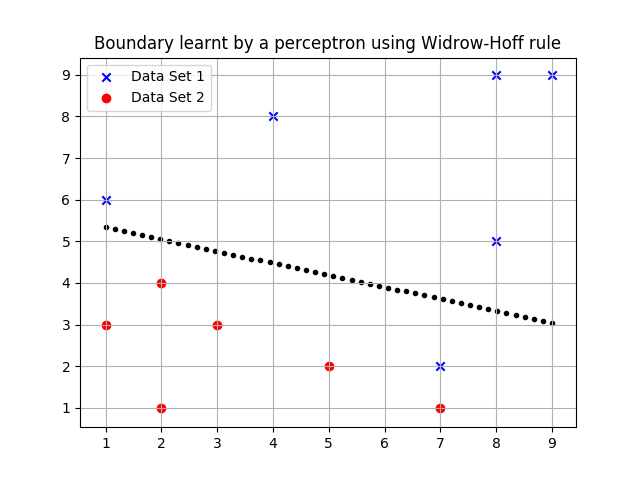

Text(0.5,1,'Boundary learnt by a perceptron using Widrow-Hoff rule')

In [88]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x=dataset1_x, y=dataset1_y, color='blue', marker='x', label='Data Set 1')
ax.scatter(x=dataset2_x, y=dataset2_y, color='red', marker='o', label='Data Set 2')
plt.grid(True)
# To plot the boundary
weights = ada.weights
slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
intercept = -weights[0]/weights[2]
for i in np.linspace(np.amin(data, axis=0)[0], np.amax(data, axis=0)[0], ):
    y = (slope * i) + intercept
    ax.scatter(x=i, y=y, color='black', marker='.')
plt.legend(loc='upper left')
plt.title('Boundary learnt by a perceptron using Widrow-Hoff rule')

### Accuracy and Error
We calculate the error and accuracy for the above classification

In [89]:
actual = ada.predict(data)
accuracy = (actual == desired).mean() * 100
error = 100 - accuracy
print("Accuracy = " + str(accuracy) + "%\nError = " + str(error) + '%')

Accuracy = 91.66666666666666%
Error = 8.333333333333343%


## Sigmoid Perceptron

### Defining the sigmoid function 

### $$
\begin{align}
f(x) = \frac{1}{1 + e^{-x}}
\end{align}
$$

In [95]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [107]:
class Sigmoid(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def learn(self, data, labels, reinitialize_weights=True):

        if reinitialize_weights:
            self.weights = np.zeros(1 + data.shape[1])

        for _ in range(self.epochs):
            for xi, target in zip(data, labels):
                output = self.net_input(xi)
                error = (target - output)
                self.weights[1:] += self.eta * xi.dot(error)
                self.weights[0] += self.eta * error
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def activation(self, X):
        return sigmoid(self.net_input(X))

    def predict(self, X):
        return np.where(self.activation(X) >= 0.5, 1, -1)

In [108]:
sig = Sigmoid(epochs=500, eta=0.001)
sig.learn(data, desired)

In [109]:
sig.weights

array([-1.02043837,  0.05184165,  0.18168536])

### Plotting the boundary learned by the Perceptron with Sigmoid activation function

<IPython.core.display.Javascript object>


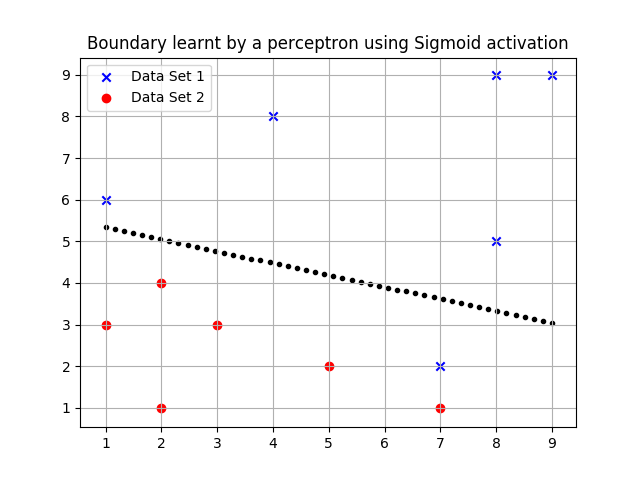

Text(0.5,1,'Boundary learnt by a perceptron using Sigmoid activation')

In [110]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x=dataset1_x, y=dataset1_y, color='blue', marker='x', label='Data Set 1')
ax.scatter(x=dataset2_x, y=dataset2_y, color='red', marker='o', label='Data Set 2')
plt.grid(True)
# To plot the boundary
weights = sig.weights
slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
intercept = -weights[0]/weights[2]
for i in np.linspace(np.amin(data, axis=0)[0], np.amax(data, axis=0)[0], ):
    y = (slope * i) + intercept
    ax.scatter(x=i, y=y, color='black', marker='.')
plt.legend(loc='upper left')
plt.title('Boundary learnt by a perceptron using Sigmoid activation')

In [111]:
sig.predict(data)

array([ 1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1])

### A look at error and accuracy of the perceptron

In [112]:
actual = sig.predict(data)
accuracy = (actual == desired).mean() * 100
error = 100 - accuracy
print("Accuracy = " + str(accuracy) + "%\nError = " + str(error) + '%')

Accuracy = 91.66666666666666%
Error = 8.333333333333343%
